In [1]:
import pandas as pd

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('Papers_about_Wikidata_query.csv')

# Calculate statistics based on unique/distinct itemLabel
unique_papers = df['itemLabel'].nunique()

# Filter out duplicate papers and retain only the first occurrence
df_unique_papers = df.drop_duplicates(subset='itemLabel')

# Split the "authors" column to separate individual authors
df_unique_papers['authors'] = df_unique_papers['authors'].str.split(', ')

# Calculate author statistics based on unique papers
author_stats = df_unique_papers.explode('authors')['authors'].value_counts().reset_index()
author_stats.columns = ['Author', 'Papers']

# Identify prolific authors based on unique papers
prolific_authors = author_stats[author_stats['Papers'] >= 5]

# Collaborations between authors based on unique papers
#collaborations = df_unique_papers['authors'].apply(lambda x: ", ".join(x)).value_counts()
collaborations = df_unique_papers['authors'].apply(lambda x: ", ".join(x) if isinstance(x, list) else "").value_counts()

# Display results
print(f"Number of Unique Papers: {unique_papers}")

print("\nAuthor Statistics (Based on Unique Papers):")
print(author_stats.head(10))  # Display the top 10 authors by the number of unique papers

print("\nProlific Authors (5 or more papers, Based on Unique Papers):")
print(prolific_authors)

print("\nCollaborations Between Authors (Based on Unique Papers):")
print(collaborations.head(10))  # Display the top collaborations


Number of Unique Papers: 478

Author Statistics (Based on Unique Papers):
                   Author  Papers
0              Jens Bemme      24
1         Daniel Mietchen      21
2           Elena Simperl      17
3       Finn Årup Nielsen      16
4        Egon Willighagen      16
5       Andra Waagmeester      14
6  José Emilio Labra Gayo      12
7            Andrew I. Su      12
8         Denny Vrandečić      10
9           Pedro Szekely      10

Prolific Authors (5 or more papers, Based on Unique Papers):
                               Author  Papers
0                          Jens Bemme      24
1                     Daniel Mietchen      21
2                       Elena Simperl      17
3                   Finn Årup Nielsen      16
4                    Egon Willighagen      16
5                   Andra Waagmeester      14
6              José Emilio Labra Gayo      12
7                        Andrew I. Su      12
8                     Denny Vrandečić      10
9                       Pedro 

C:\Users\ABINAYA THULSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


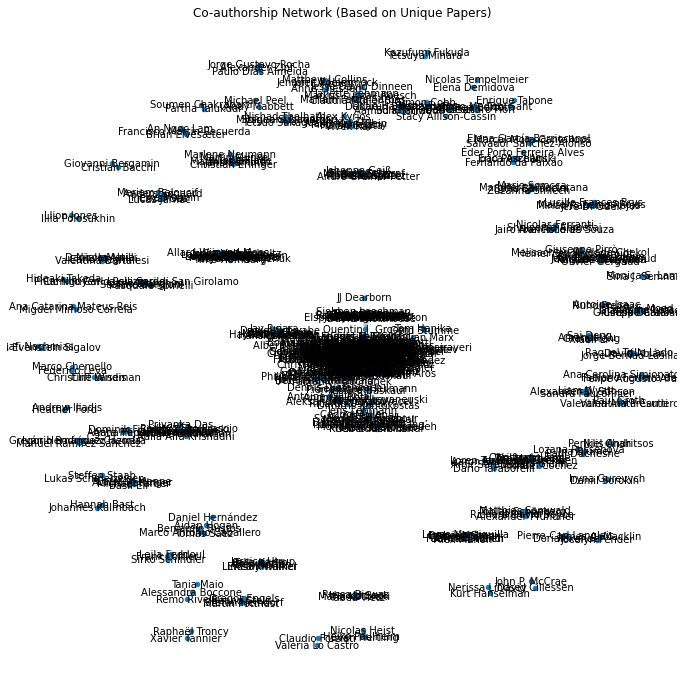


Top Central Authors (Based on Unique Papers):
Daniel Mietchen: Degree Centrality = 0.19027484143763215
Egon Willighagen: Degree Centrality = 0.15010570824524314
Andra Waagmeester: Degree Centrality = 0.11416490486257928
Andrew I. Su: Degree Centrality = 0.10147991543340382
Thomas Shafee: Degree Centrality = 0.08879492600422834
Ralf Stephan: Degree Centrality = 0.08668076109936576
Denise Slenter: Degree Centrality = 0.08456659619450317
Gregory Stupp: Degree Centrality = 0.0824524312896406
Katherine Thornton: Degree Centrality = 0.07822410147991543
Timothy Elliott Putman: Degree Centrality = 0.07822410147991543


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a co-authorship network based on unique papers
G = nx.Graph()
for authors in df_unique_papers['authors']:
    if isinstance(authors, list):  # Check if 'authors' is a valid list
        for author1 in authors:
            for author2 in authors:
                if author1 != author2:
                    if G.has_edge(author1, author2):
                        G[author1][author2]['weight'] += 1
                    else:
                        G.add_edge(author1, author2, weight=1)

# Extract edges and weights separately
edges = list(G.edges())
weights = [G[u][v]['weight'] for u, v in edges]

# Draw the co-authorship network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[0.1 * w for w in weights], edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.axis("off")
plt.title("Co-authorship Network (Based on Unique Papers)")
plt.show()

# Identify central authors
degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop Central Authors (Based on Unique Papers):")
for author, centrality in sorted_centrality[:10]:
    print(f"{author}: Degree Centrality = {centrality}")








In [4]:
from collections import defaultdict

# Create a dictionary to store collaboration counts between authors
collaboration_counts = defaultdict(int)

# Iterate through the edges of the co-authorship network
for author1, author2, data in G.edges(data=True):
    if 'weight' in data:
        weight = data['weight']
        # Increment the collaboration count between author1 and author2
        collaboration_counts[(author1, author2)] += weight

# Find author pairs with collaboration count greater than 1
collaboration_pairs = {authors: count for authors, count in collaboration_counts.items() if count > 1}

# Sort the collaboration pairs by collaboration count (from highest to lowest)
sorted_collaboration_pairs = sorted(collaboration_pairs.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 collaboration pairs with the highest collaboration counts
print("Top 10 Author Pairs with Highest Collaboration Counts:\n")
for (author1, author2), count in sorted_collaboration_pairs[:10]:
    print(f"{author1} and {author2}: Collaboration Count = {count}")


Top 10 Author Pairs with Highest Collaboration Counts:

Andra Waagmeester and Andrew I. Su: Collaboration Count = 22
Daniel Mietchen and Egon Willighagen: Collaboration Count = 20
Elena Simperl and Lucie-Aimée Kaffee: Collaboration Count = 16
Pedro Szekely and Filip Ilievski: Collaboration Count = 16
Daniel Mietchen and Thomas Shafee: Collaboration Count = 14
Andra Waagmeester and Benjamin M. Good: Collaboration Count = 14
Andra Waagmeester and Sebastian Burgstaller-Muehlbacher: Collaboration Count = 14
Benjamin M. Good and Andrew I. Su: Collaboration Count = 14
Benjamin M. Good and Sebastian Burgstaller-Muehlbacher: Collaboration Count = 14
Andrew I. Su and Timothy Elliott Putman: Collaboration Count = 14
